In [2]:
#primero importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#luego leemos el dataset
file = pd.read_csv('dataset.csv')
df = pd.DataFrame(file)

In [4]:
#visualizacion de las primeras filas
df.head()

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,danceability,energy,key,...,tempo,id,time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,...,116.998,4WUepByoeqcedHoYhSNHRt,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,...,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,...,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22


Visualizamos valores faltantes

In [5]:
missing_values = df.isna().sum()
print(missing_values)

disc_number            0
duration_ms            0
explicit               0
track_number           0
track_popularity       0
track_id               8
track_name             7
danceability           2
energy                 2
key                    1
loudness               2
mode                   0
speechiness            1
acousticness           1
instrumentalness       0
liveness               1
valence                0
tempo                  1
id                     0
time_signature         1
artist_id              0
artist_name            0
artist_popularity      0
album_id               0
album_name            62
album_release_date     0
album_total_tracks     0
dtype: int64


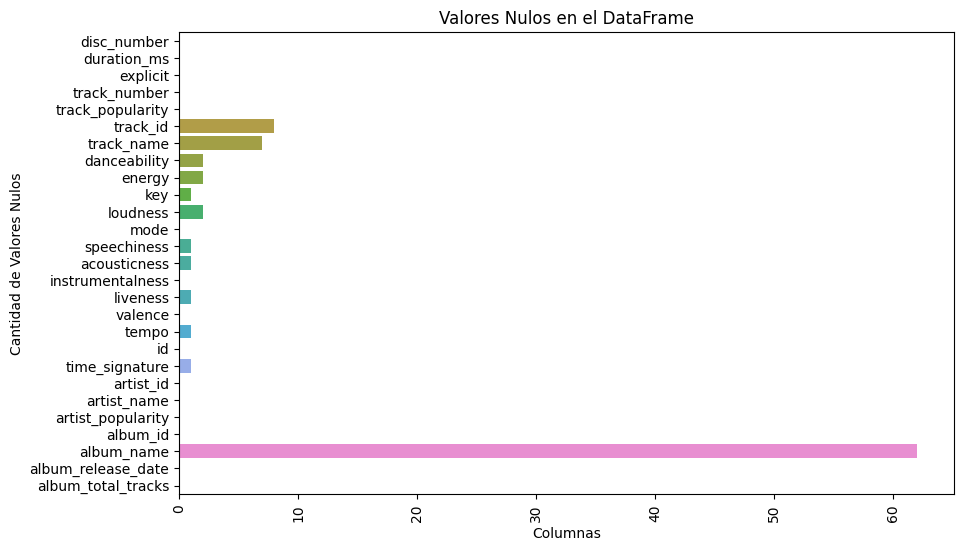

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.isna().sum(), y=df.columns)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos en el DataFrame')
plt.show()

Visualizamos valores duplicados

In [7]:
duplicates = df[df.duplicated()]
print(duplicates)

     disc_number  duration_ms explicit  track_number  track_popularity  \
88             1       234466     True            21                82   
295            1       170640    False             1                77   
297            1       221306    False             3                92   
298            1       190360    False             4                86   
299            1       211240    False             5                82   
300            1       173386    False             6                78   
301            1       234146    False             7                83   
302            1       222400    False             8                86   
303            1       287266    False             9                81   
304            1       198533    False            10                79   
305            1       190240    False            11                80   
306            1       201586    False            12                72   
307            1       200306    False

In [8]:
#si solo deseas saber cuántas filas están duplicadas:
print("Número de filas duplicadas:", duplicates.shape[0])

Número de filas duplicadas: 18


Visualizamos valores unicos

In [9]:
#obtenemos las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns

#examinamos la cantidad de valores únicos en cada columna categórica
for columna in columnas_categoricas:
    print(f"Columna: {columna}")
    print(f"Número de valores únicos: {df[columna].nunique()}")
    print(df[columna].value_counts())
    print("----------------------------")

Columna: explicit
Número de valores únicos: 4
explicit
False    480
True      54
No         4
Si         1
Name: count, dtype: int64
----------------------------
Columna: track_id
Número de valores únicos: 512
track_id
1fzAuUVbzlhZ1lJAx9PtY6    2
2dgFqt3w9xIQRjhPtwNk3D    2
1dGr1c8CrMLDpV6mPbImSI    2
3pHkh7d0lzM2AldUtz2x37    2
2YWtcWi3a83pdEg3Gif4Pd    2
                         ..
01QdEx6kFr78ZejhQtWR5m    1
0tQ9vBYpldCuikPsbgOVKA    1
2m3ObD945KvpE5y9A1eUWm    1
3ExweHKZF9B752DPQByRVT    1
1hxLyjC9D9Jpw6EAPKqWv4    1
Name: count, Length: 512, dtype: int64
----------------------------
Columna: track_name
Número de valores únicos: 331
track_name
The Story Of Us                                     4
Sweet Nothing                                       3
Lavender Haze                                       3
Question...?                                        3
Midnight Rain                                       3
                                                   ..
Don’t You (Taylor’s 

Tipos de variables presentes en el dataframe

In [10]:
df.dtypes

disc_number             int64
duration_ms             int64
explicit               object
track_number            int64
track_popularity        int64
track_id               object
track_name             object
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness       object
liveness              float64
valence               float64
tempo                 float64
id                     object
time_signature        float64
artist_id              object
artist_name            object
artist_popularity       int64
album_id               object
album_name             object
album_release_date     object
album_total_tracks     object
dtype: object

'album_release_date' tendria que cambiar su formato a tipo datetime

Estadisticas descriptivas

In [11]:
selected_columns = ['duration_ms', 'danceability', 'energy', 'key', 'loudness',
                    'mode', 'speechiness', 'acousticness', 'liveness', 'valence',
                    'tempo', 'time_signature']

#obtenemos las estadísticas descriptivas para las columnas seleccionadas
df_stats = df[selected_columns].describe()

#transponemos el dataFrame para tener las variables como filas
df_stats = df_stats.T
print(df_stats)

                count           mean           std           min  \
duration_ms     539.0  236003.725417  55019.871010 -223093.00000   
danceability    537.0       0.587242      0.116858       0.24300   
energy          537.0       0.573065      0.192309       0.11800   
key             538.0       4.587361      3.246082       0.00000   
loudness        537.0      -7.520639      2.933158     -17.93200   
mode            539.0       0.912801      0.282388       0.00000   
speechiness     538.0       0.057709      0.073146       0.02310   
acousticness    538.0       0.337806      0.395292      -0.00354   
liveness        538.0       0.163308      0.141800       0.03350   
valence         539.0       0.398410      0.199409       0.03740   
tempo           538.0     122.362639     30.485522      68.09700   
time_signature  538.0       3.986989      0.197323       3.00000   

                          25%           50%           75%         max  
duration_ms     209486.500000  233626.00000

Visualicemos un pairplot con las distintas relaciones entre variables

C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

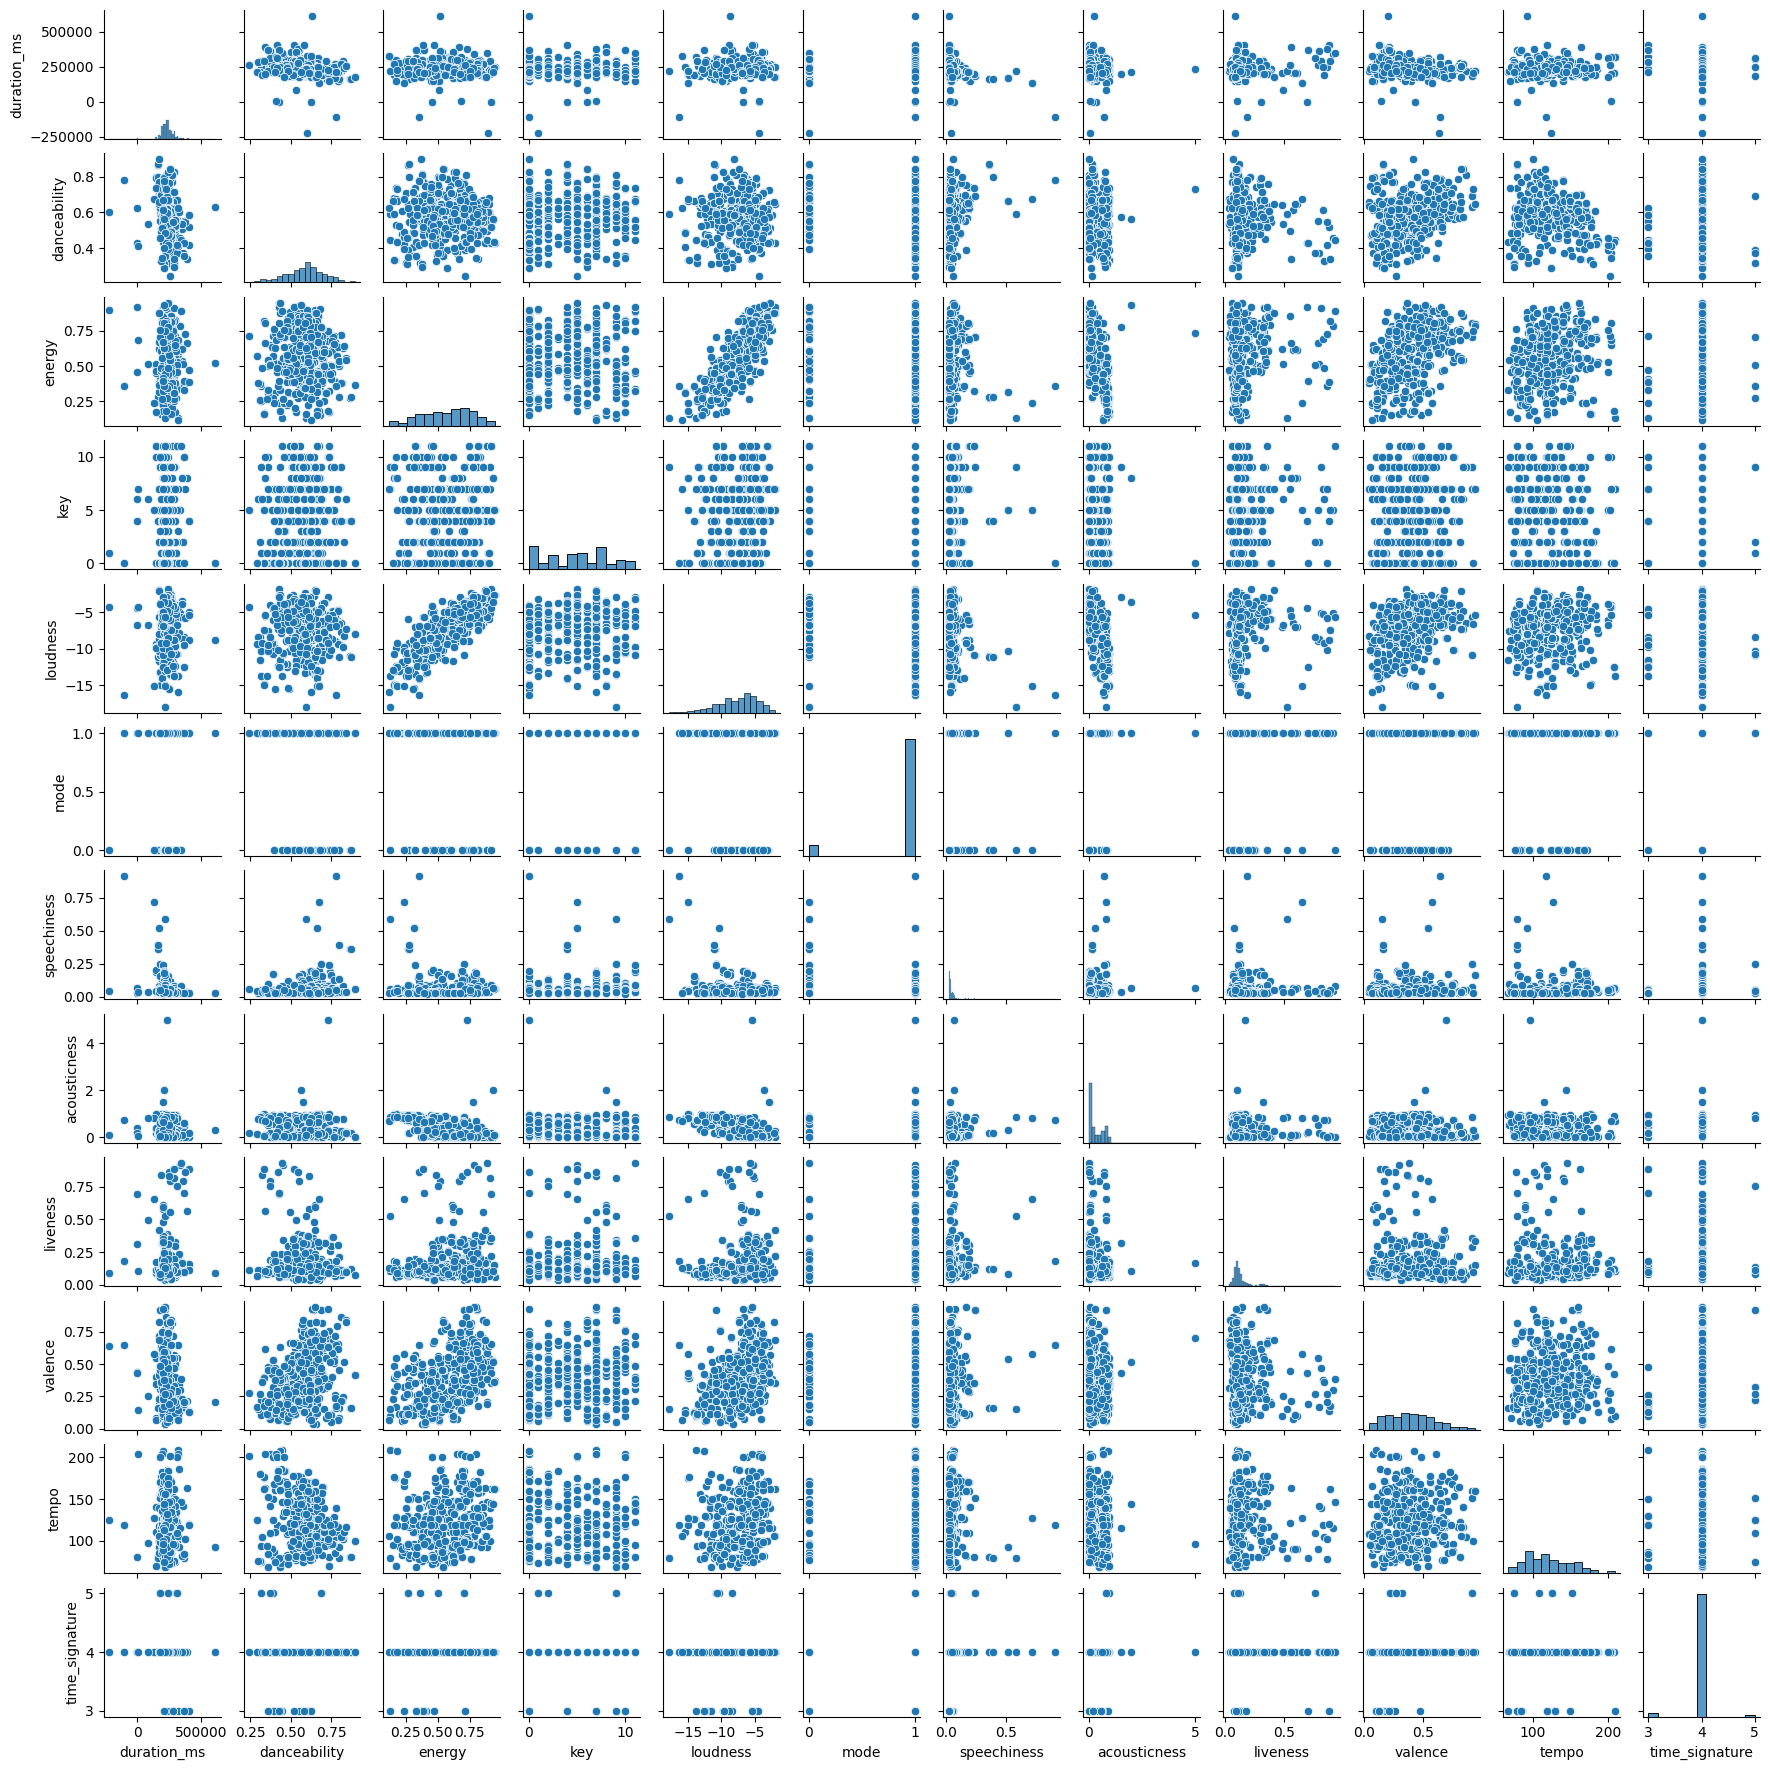

In [15]:
# Crear el pairplot con la paleta de colores "husl" y el tamaño de 2.5 pulgadas por gráfico
sns.pairplot(df[selected_columns], palette="husl", height=1.5)

# Mostrar el pairplot
plt.show()

A partir del grafico pairplot anterior podemos denotar las siguientes conclusiones:

•La variable loudness tiene una correlación negativa con acousticness, lo que significa que a mayor sonoridad, menor acústica.

•La variable energy tiene una correlación positiva con loudness, lo que significa que a mayor energía, mayor sonoridad.

•La variable duration_ms tiene una correlación positiva con liveness, lo que significa que a mayor duración, mayor probabilidad de que la canción sea en vivo.

•La variable valence tiene una correlación positiva con danceability, lo que significa que a mayor valencia, mayor capacidad de baile.

•La variable tempo no tiene una correlación clara con ninguna otra variable, lo que significa que el tempo es independiente de las demás características de las canciones.

•La variable key tiene una distribución uniforme, lo que significa que todas las tonalidades son igualmente probables.

•La variable mode tiene una distribución binomial, lo que significa que solo hay dos modos posibles: mayor o menor.

Visualizamos la distribucion de diversas variables de interés

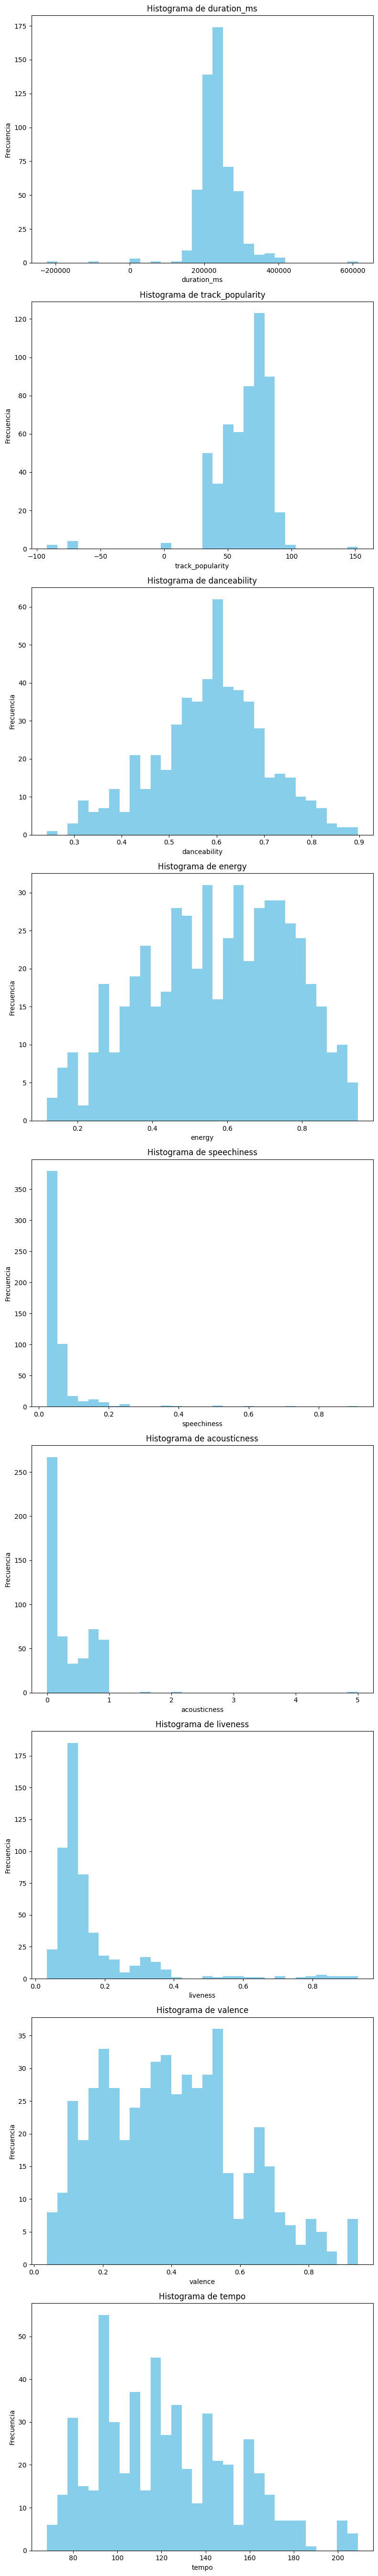

In [17]:
#listamos las variables para las cuales haremos los histogramas
columnas_histogramas = ['duration_ms', 'track_popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

#creamos los subplots para cada histograma
fig, axs = plt.subplots(nrows=len(columnas_histogramas), figsize=(8, 6 * len(columnas_histogramas)))

#generamos los histogramas
for i, columna in enumerate(columnas_histogramas):
    axs[i].hist(df[columna], bins=30, color='skyblue')
    axs[i].set_title(f'Histograma de {columna}')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Identificamos outliers

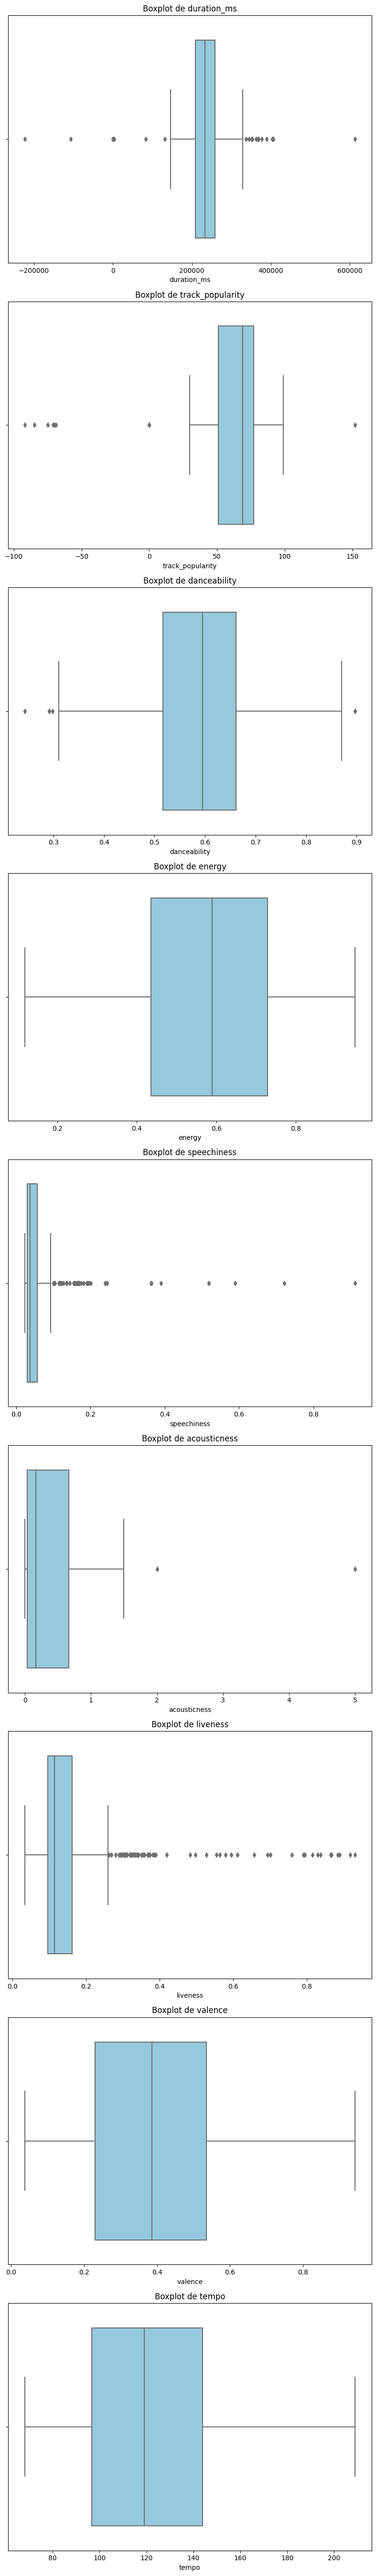

In [18]:
#listamos las variables
columnas_boxplot = ['duration_ms', 'track_popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

#creamos los subplots para mostrar varios boxplots
fig, axs = plt.subplots(nrows=len(columnas_boxplot), figsize=(8, 6 * len(columnas_boxplot)))

#generamos boxplots para cada columna
for i, columna in enumerate(columnas_boxplot):
    sns.boxplot(x=df[columna], ax=axs[i], color='skyblue')
    axs[i].set_title(f'Boxplot de {columna}')
    axs[i].set_xlabel(columna)

plt.tight_layout()
plt.show()

Podemos visualizar claramente como las variables 'duration_ms', 'track_popularity' y 'danceability' tienen valores outliers alejados de la caja central, mientras que 'speechiness', 'acousticness' y 'liveness' presentan valores outliers alejandose en un extremo derecho de la caja central, por ultimo, las variables que no presentan outliers son 'energy', 'valence' y 'tempo'.

Matriz de correlacion de variables numéricas

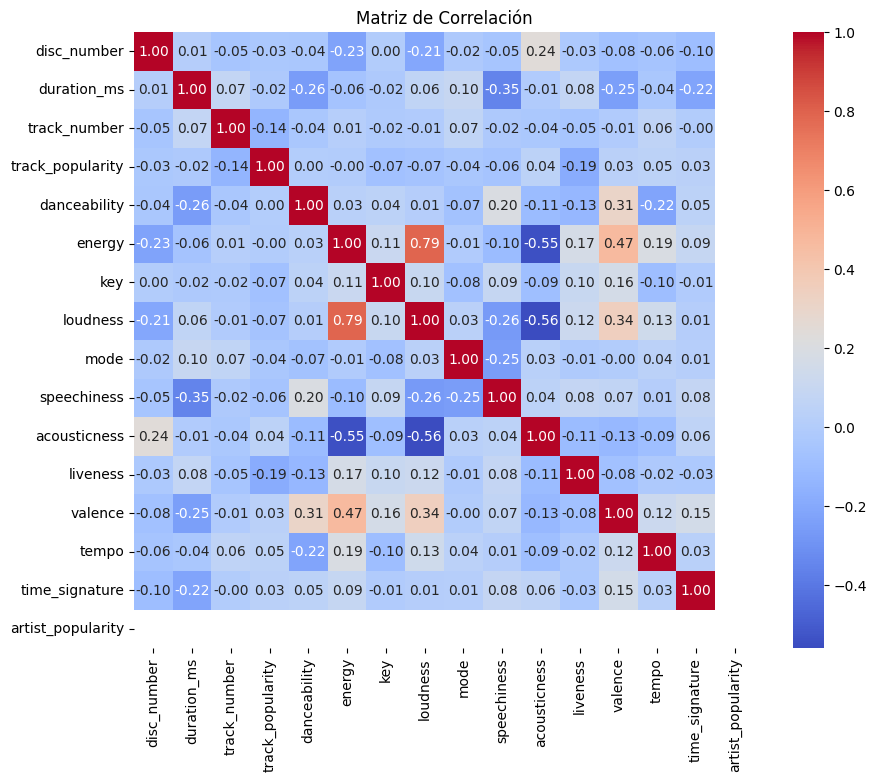

In [19]:
#seleccionamos solo las columnas numéricas para la matriz de correlación
numeric_data = df.select_dtypes(include='number')

#calculamos la matriz de correlación
correlation_matrix = numeric_data.corr()

#visualizamos la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Podemos identificar diversas conclusiones en esta matriz de correlacion ya que hay varias correlaciones fuertes y otras debiles.

**Energía y Loudness (0.79)**: Esta alta correlación positiva indica que las canciones más enérgicas tienden a ser más altas. Esto tiene sentido, ya que la energía mide el nivel de intensidad y actividad de una pista, y la sonoridad mide el nivel de volumen percibido por el oído humano.

**Acousticness y Energy (-0.55)**: Esta correlación negativa moderada sugiere que las canciones acústicas tienden a tener menos energía. Esto también tiene sentido, ya que la acústica mide el nivel de presencia de instrumentos acústicos en una pista, y estos suelen ser más suaves y tranquilos que los instrumentos eléctricos o electrónicos.

**Valence y Danceability (0.34)**: Esta correlación positiva moderada indica que las canciones con un tono más positivo o feliz son más propensas a ser bailables. Esto puede reflejar el hecho de que las canciones bailables suelen tener ritmos más rápidos y contagiosos, y letras más optimistas y divertidas.

Conteo de frecuencia para las variables categóricas

In [20]:
#listamos las columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

#calculamos el conteo de frecuencia para cada columna categórica
for column in categorical_columns:
    frequency_counts = df[column].value_counts()
    print(f"Conteo de frecuencia para '{column}':")
    print(frequency_counts)
    print("\n")

Conteo de frecuencia para 'explicit':
explicit
False    480
True      54
No         4
Si         1
Name: count, dtype: int64


Conteo de frecuencia para 'track_id':
track_id
1fzAuUVbzlhZ1lJAx9PtY6    2
2dgFqt3w9xIQRjhPtwNk3D    2
1dGr1c8CrMLDpV6mPbImSI    2
3pHkh7d0lzM2AldUtz2x37    2
2YWtcWi3a83pdEg3Gif4Pd    2
                         ..
01QdEx6kFr78ZejhQtWR5m    1
0tQ9vBYpldCuikPsbgOVKA    1
2m3ObD945KvpE5y9A1eUWm    1
3ExweHKZF9B752DPQByRVT    1
1hxLyjC9D9Jpw6EAPKqWv4    1
Name: count, Length: 512, dtype: int64


Conteo de frecuencia para 'track_name':
track_name
The Story Of Us                                     4
Sweet Nothing                                       3
Lavender Haze                                       3
Question...?                                        3
Midnight Rain                                       3
                                                   ..
Don’t You (Taylor’s Version) (From The Vault)       1
Bye Bye Baby (Taylor’s Version) (From The Vault)

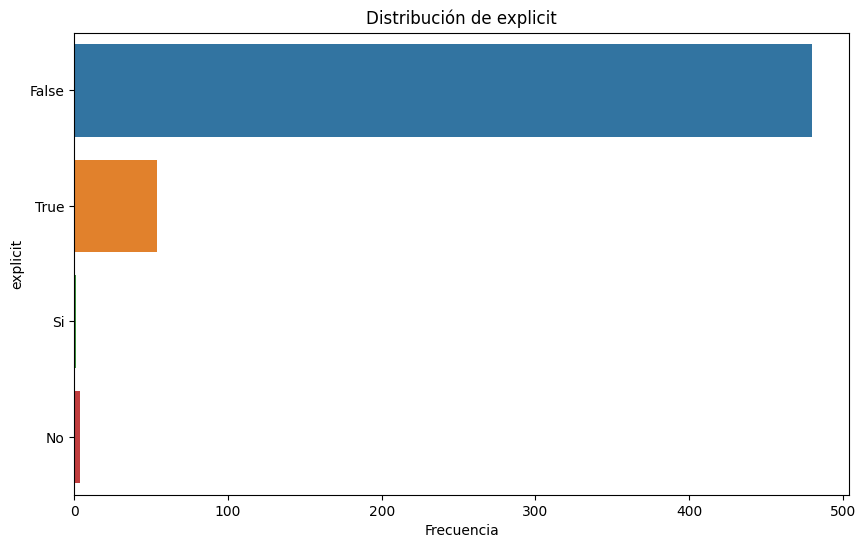

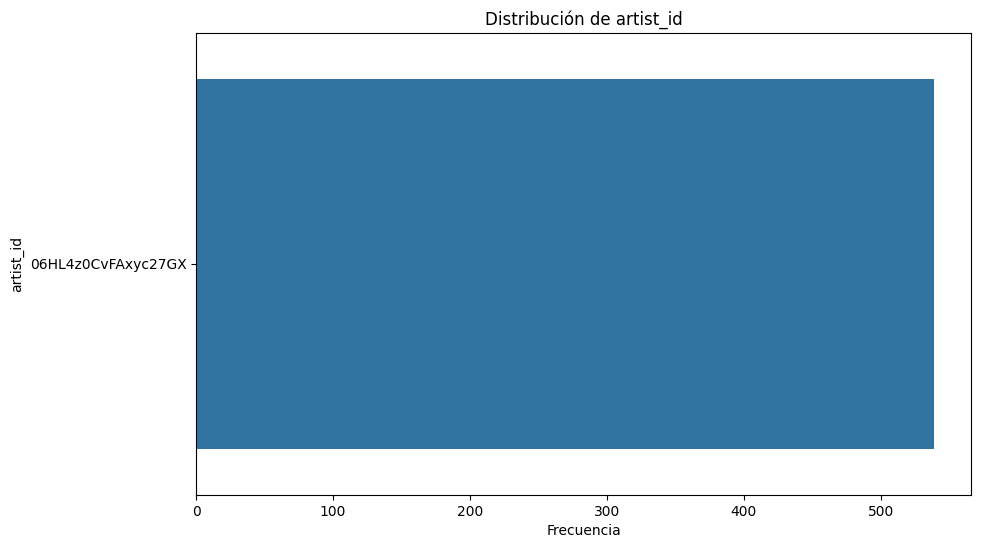

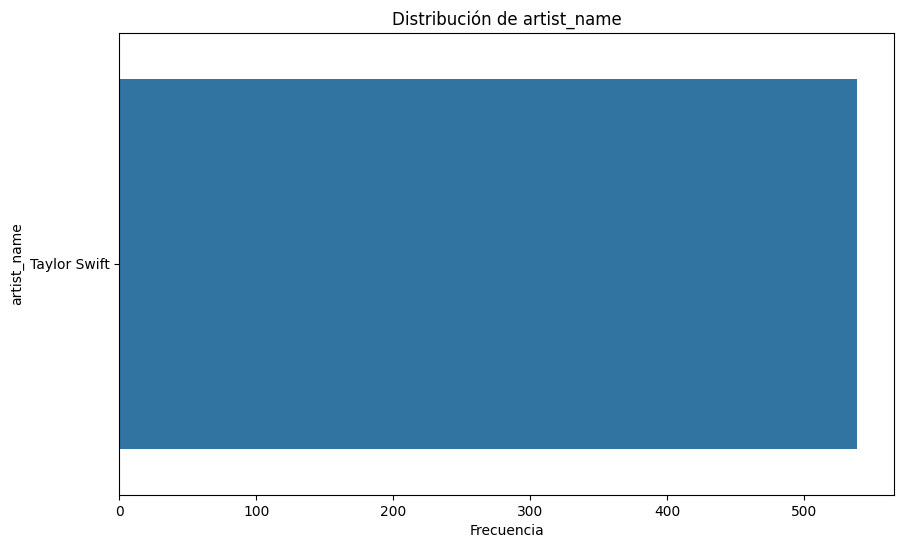

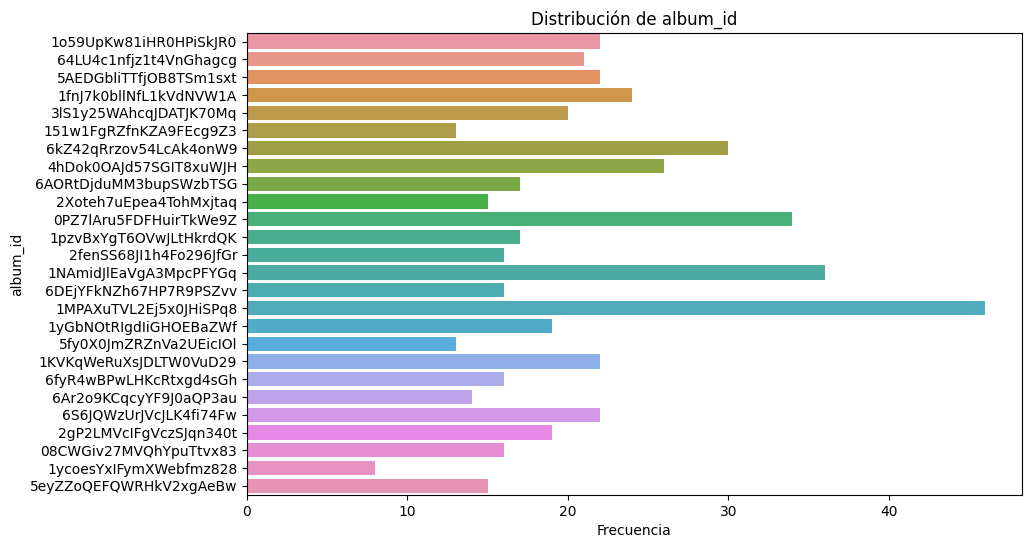

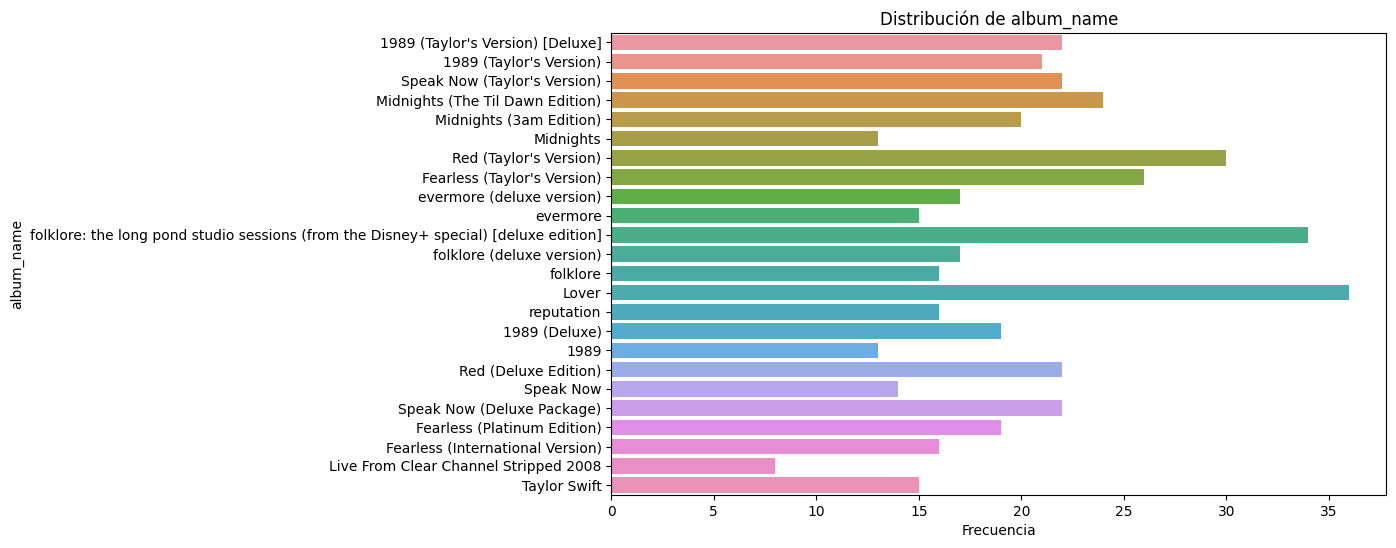

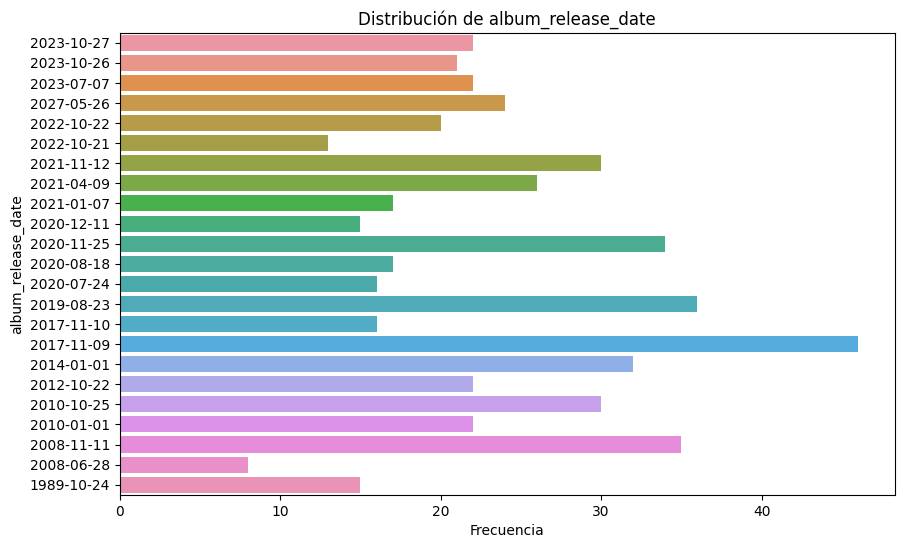

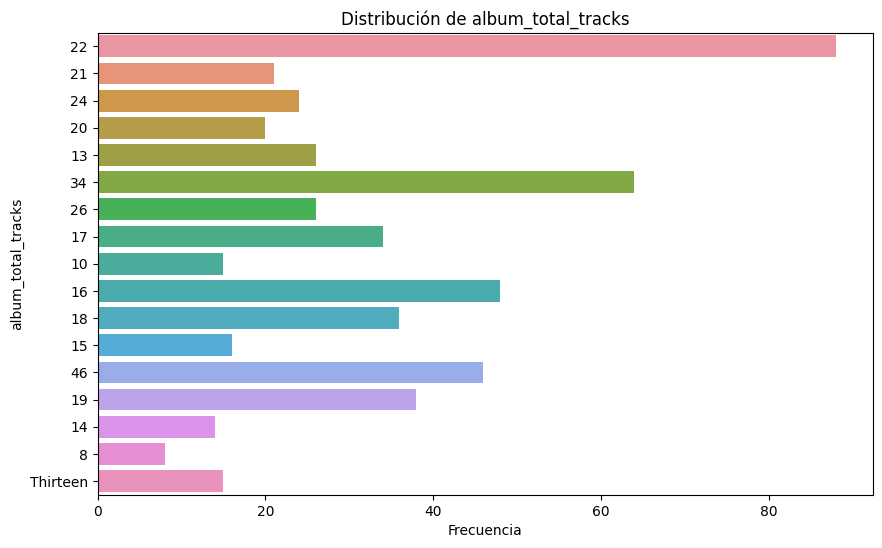

In [21]:
#seleccionamos las columnas de interés
selected_columns = ['explicit', 'artist_id', 'artist_name', 'album_id', 'album_name', 'album_release_date', 'album_total_tracks']

#creamos los gráficos de barras para cada variable
for column in selected_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=column)
    plt.title(f'Distribución de {column}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)
    plt.show()

Analisis de tendencias temporales a lo largo del tiempo

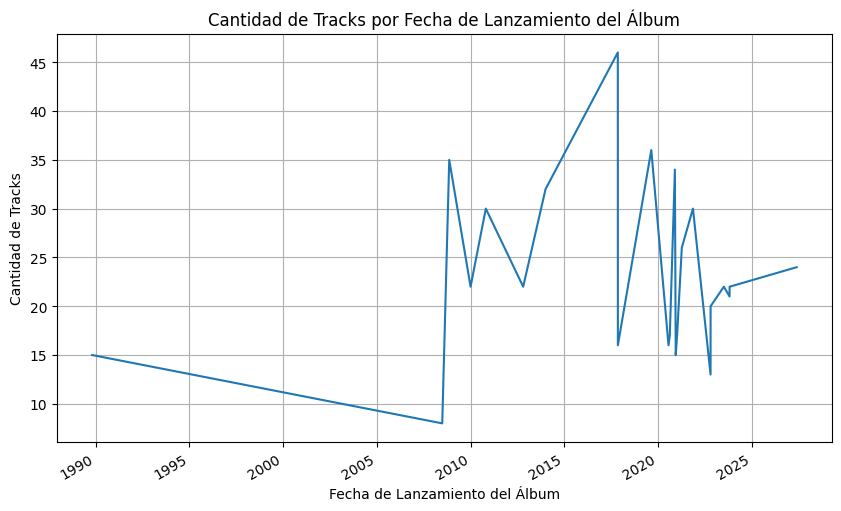

In [22]:
#nos aseguramos de que 'album_release_date' sea de tipo datetime
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

#agrupamos por fecha y contamos la cantidad de tracks por fecha de lanzamiento del álbum
tracks_por_fecha = df.groupby('album_release_date').size()

#graficamos la cantidad de tracks a lo largo del tiempo
plt.figure(figsize=(10, 6))
tracks_por_fecha.plot(kind='line')
plt.title('Cantidad de Tracks por Fecha de Lanzamiento del Álbum')
plt.xlabel('Fecha de Lanzamiento del Álbum')
plt.ylabel('Cantidad de Tracks')
plt.grid(True)
plt.show()

La gráfica muestra la evolución de la cantidad de pistas en los álbumes lanzados a lo largo del tiempo, desde 1990 hasta el futuro cercano.

Se puede observar que hay una tendencia creciente hasta alrededor del año 2015, donde se alcanza el máximo de casi 45 pistas por álbum. Esto podría deberse a que los artistas aprovecharon las ventajas de la tecnología digital y el streaming para producir y distribuir más música.

Sin embargo, después del año 2015, se produce una caída significativa en la cantidad de pistas por álbum, llegando a menos de 15 en el año 2020. Esto podría deberse a que los artistas se adaptaron a los cambios en el mercado y las preferencias de los consumidores, optando por lanzar álbumes más cortos y frecuentes, o incluso singles individuales.

Finalmente, se observa un ligero aumento en la cantidad de pistas por álbum hacia el año 2025, lo que podría indicar una recuperación o una nueva tendencia en la industria musical.